## Directions and Overview

The main purpose of this assignment is for you to gain experience using artificial neural networks to solve simple regression problems.  In this assignment, you will fit a neural network to a noisy 3D sinusoidal data set.  You will use a `Sequential` model that can be trained very quickly on the supplied data, so I want you to manually adjust hyperparameter values and observe their influence on the model's predictions.  That is, you should manually sweep the hyperparameter space and try to hone in on the reasonable hyperparameter values, again, _manually_.  (Yep, that means guess-and-check: pick some values, train the model, observe the prediction curve, repeat.)

So, play around and build some models.  When you are done playing with hyperparameter values, you should finish by building an ANN that models the data reasonably well! You should be able to train a model and use it to predict a curve at least as good as mine, but your goal should be to obtain a smoother and less erratic curve.

(Side Note: Achieving a less erratic prediction curve could be done either by building a better model, ___OR___ by sorting the data more intelligently thereby plotting a prediction curve that looks better.  I propose the ideal line is created by sorting the data in such a way that the resulting line minimizes the arc length of the curve. You don't need to worry about any of this, however you do need to generate a figure with a descent-looking prediction curve superimposed on the data.)

Here just just a few of the hyperparameters you can play around with:

- number of nodes per layer
- number of layers
- activation functions
- normalization method (should be negligible)
- number of epochs
- learning rate
- loss function

You will know that you have obtained a reasonable model when the model's prediction curve looks reasonable.  ___Below you will be asked to plot the model's prediction curve along with the training data.  Even if you correctly train the model, you may find that your trendline looks totally crazy and out-of-this-world when you first plot it.  If this happens to you, try plotting the model's predictions using a scatter plot rather than a connected line plot.  You should be able to infer the problem and solution with plotting the trendline from examining this new scatter plot of the model's predictions.___  

Lastly in this assignment, you will compute the generalization error on the test set.

## Preliminaries

Let's import some common packages:

In [20]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot3Ddata(data_df):
    fig = plt.figure(figsize = (12,12))

    # =============
    # First subplot
    # =============
    # set up the axes for the first plot
    ax1 = fig.add_subplot(2, 2, 1, projection='3d')
    ax1.scatter3D(data_df['x_train'], data_df['y_train'], data_df['z_train'])
    ax1.set_xlabel("x", c='r', fontweight='bold', fontsize=18)
    ax1.set_ylabel("y", c='r', fontweight='bold', fontsize=18)
    ax1.set_zlabel("z", c='r', fontweight='bold', fontsize=18)
    ax1.view_init(0, 87)
    save_fig('1-img')
    # =============
    # Second subplot
    # =============
    # set up the axes for the second plot
    ax2 = fig.add_subplot(2, 2, 2, projection='3d')
    ax2.scatter3D(data_df['x_train'], data_df['y_train'], data_df['z_train'])
    ax2.set_xlabel("x", c='r', fontweight='bold', fontsize=18)
    ax2.set_ylabel("y", c='r', fontweight='bold', fontsize=18)
    ax2.set_zlabel("z", c='r', fontweight='bold', fontsize=18)
    ax2.view_init(36, 1)
    save_fig('2-img')
    
    # =============
    # 3rd subplot
    # =============
    # set up the axes for the third plot
    ax3 = fig.add_subplot(2, 2, 3, projection='3d')
    ax3.scatter3D(data_df['x_train'], data_df['y_train'], data_df['z_train']) 
    ax3.set_xlabel("x", c='r', fontweight='bold', fontsize=18)
    ax3.set_ylabel("y", c='r', fontweight='bold', fontsize=18)
    ax3.set_zlabel("z", c='r', fontweight='bold', fontsize=18)
    ax3.view_init(340, 100)
    save_fig('3-img')
    
    # =============
    # 4th subplot
    # =============
    # set up the axes for the second plot
    ax4 = fig.add_subplot(2, 2, 4, projection='3d')
    ax4.scatter3D(data_df['x_train'], data_df['y_train'], data_df['z_train'])
    ax4.set_xlabel("x", c='r', fontweight='bold', fontsize=18)
    ax4.set_ylabel("y", c='r', fontweight='bold', fontsize=18)
    ax4.set_zlabel("z", c='r', fontweight='bold', fontsize=18)
    ax4.view_init(90, 90)
    save_fig('4-img')
    
    plt.show()
    
def plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z):
    fig = plt.figure(figsize = (12,12))

    # =============
    # First subplot
    # =============
    # set up the axes for the first plot
    ax1 = fig.add_subplot(2, 2, 1, projection='3d')
    ax1.scatter3D(scat_x, scat_y, scat_z)
    ax1.scatter3D(fit_x, fit_y, fit_z, c='black')
    ax1.set_xlabel("x", c='r', fontweight='bold', fontsize=18)
    ax1.set_ylabel("y", c='r', fontweight='bold', fontsize=18)
    ax1.set_zlabel("z", c='r', fontweight='bold', fontsize=18)
    ax1.view_init(0, 87)
    save_fig('1-prediction-img')
    
    # =============
    # Second subplot
    # =============
    # set up the axes for the second plot
    ax2 = fig.add_subplot(2, 2, 2, projection='3d')
    ax2.scatter3D(scat_x, scat_y, scat_z)
    ax2.scatter3D(fit_x, fit_y, fit_z, c='black')
    
    ax2.set_xlabel("x", c='r', fontweight='bold', fontsize=18)
    ax2.set_ylabel("y", c='r', fontweight='bold', fontsize=18)
    ax2.set_zlabel("z", c='r', fontweight='bold', fontsize=18)
    ax2.view_init(36, 1)
    save_fig('2-prediction-img')

    
    # =============
    # 3rd subplot
    # =============
    # set up the axes for the third plot
    ax3 = fig.add_subplot(2, 2, 3, projection='3d')
    ax3.scatter3D(scat_x, scat_y, scat_z)
    ax3.scatter3D(fit_x, fit_y, fit_z, c='black')  
    ax3.set_xlabel("x", c='r', fontweight='bold', fontsize=18)
    ax3.set_ylabel("y", c='r', fontweight='bold', fontsize=18)
    ax3.set_zlabel("z", c='r', fontweight='bold', fontsize=18)
    ax3.view_init(340, 100)
    save_fig('3-prediction-img')

    
    # =============
    # 4th subplot
    # =============
    # set up the axes for the second plot
    ax4 = fig.add_subplot(2, 2, 4, projection='3d')
    ax4.scatter3D(scat_x, scat_y, scat_z)
    ax4.scatter3D(fit_x, fit_y, fit_z, c='black')  
    ax4.set_xlabel("x", c='r', fontweight='bold', fontsize=18)
    ax4.set_ylabel("y", c='r', fontweight='bold', fontsize=18)
    ax4.set_zlabel("z", c='r', fontweight='bold', fontsize=18)
    ax4.view_init(90, 90)
    save_fig('4-prediction-img')
    plt.show()

# Import, Split and Standardize Data

Complete the following:



1. Begin by importing the data from the file called `3DSinusoidalANN.csv`.  Name the returned DataFrame `data`.

2. Call [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with a `test_size` of 20%.  Save the output into `X_train`, `X_test`, `y_train`, and `y_test`, respectively. Looking at the below graph, it makes sense for `x` and `z` to be your training data and `y` to be your response data.  Specify the `random_state` parameter to be `42` (do this throughout the entire note book).

3. Next, use the `StandardScaler()` to scale your data.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
### ENTER CODE HERE ###
data = pd.read_csv("3DSinusoidalANN.csv")
data.head()

,x,y,z
0,5.003425,-0.097041,0.136004
1,4.914072,-0.049873,-1.726903
2,5.236610,0.257471,-1.838183
3,5.217523,0.212911,-0.669068
4,5.114359,0.808719,0.302012


In [4]:
data.shape

(560, 3)

In [5]:
X = data[['x','z']] # x and z for traning data
y = data[['y']] # y for response data

# tran test splitting
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 42)

In [6]:
# lets standarize the data
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

std1 = StandardScaler()
y_train = std1.fit_transform(y_train)
y_test = std1.transform(y_test)

In [7]:
# lets get the training data into dataframe
train_df = pd.DataFrame(X_train, columns = ['x_train', 'z_train'])
y_train_df = pd.DataFrame(y_train, columns = ['y_train'])

train_df = pd.concat([train_df,y_train_df], axis = 1)
train_df

,x_train,z_train,y_train
0,-0.710412,1.484588,1.060069
1,1.170909,1.133518,0.597008
2,1.348213,-1.747367,-0.249185
3,1.404941,-1.683342,0.126391
4,-0.703923,0.091213,0.992957
...,...,...,...
443,-0.538994,-1.336241,1.166031
444,-1.321759,-1.163180,0.309647
445,-0.274939,0.033026,1.227174
446,1.268611,1.023924,-0.373109


# Plot Data

Simply plot your training data here, so that you know what you are working with.  You must define a function called `plot3Ddata`, which accepts a Pandas DataFrame (composed of 3 spatial coordinates) and uses `scatter3D()` to plot the data.  Use this function to plot only the training data (recall that you don't even want to look at the test set, until you are ready to calculate the generalization error).  You must place the definition of this function in the existing code cell of the above __Preliminaries__ section, and have nothing other than the function invocation in the below cell. 

You must emulate the graphs shown in the respective sections below. Each of the graphs will have four subplots. Note the various viewing angles that each subplot presents - you can achieve this with the view_init() method. Be sure to label your axes as shown.

Saving figure 1-img
Saving figure 2-img
Saving figure 3-img
Saving figure 4-img


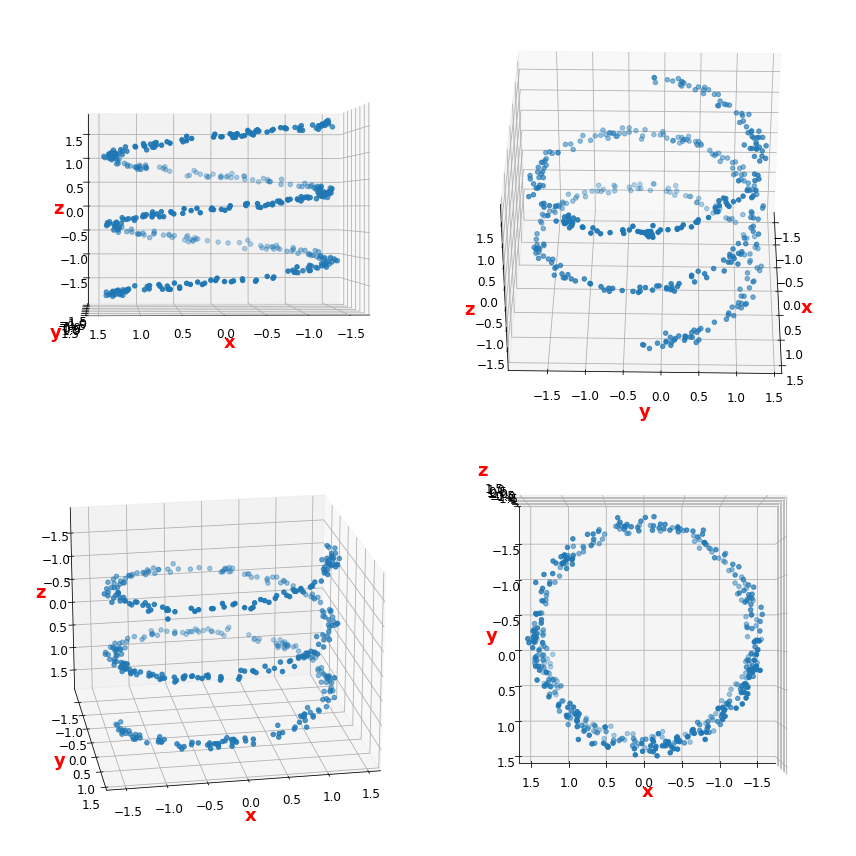

In [8]:
plot3Ddata(train_df)

## A Quick Note

In the following sections you will be asked to plot the training data along with the model's predictions for that data superimposed on it.  You must write a function called `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` that will plot this figure.  The function accepts six parameters as input, shown in the function signature.  All six input parameters must be NumPy arrays.  The three Numpy arrays called `fit_x, fit_y,` and  `fit_z` represent the x, y, and z coordinates of the model predictions (i.e. the prediction curve).  The three Numpy arrays called `scat_x, scat_y,` and  `scat_z` represent the x, y, and z coordinates of the training data.   

You must place the definition of the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function in the existing code cell of the above __Preliminaries__ section. (The function header is already there - you must complete the function definition.)  You will use the `plotscatter3Ddata()` function in the following section.

# Explore 3D Sinusoidal Data with Artifical Neural Networks

Fit a `Sequential` model to this data.  You must manually assign values to the hyperparameters, including the number of nuerons per layer and the number of layers.  You should "play around" by using different combinations of hyperparameter values.  When you are done playing, you should build an ANN that models the data well.  Then, you will use that modelto calculate the generalization error in the subsequent section.

In [9]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from math import sqrt

In [10]:
# lets build the ANN arcitecture
reg = Sequential()
reg.add(Dense(256,input_dim=2,activation='relu'))
reg.add(Dense(128,activation='relu'))
reg.add(Dense(64,activation='relu'))
reg.add(Dense(1, activation = 'linear'))
reg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               768       
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 41,985
Trainable params: 41,985
Non-trainable params: 0
_________________________________________________________________


In [11]:
reg.compile(optimizer='adam',loss='mean_squared_error') # compile the model

In [12]:
history = reg.fit(X_train,y_train,epochs=500, validation_data=(X_test, y_test)) # fit the model

Epoch 1/500
14/14 [==============================] - 1s 21ms/step - loss: 0.9587 - val_loss: 0.9997
Epoch 2/500
14/14 [==============================] - 0s 5ms/step - loss: 0.8917 - val_loss: 0.9455
Epoch 3/500
14/14 [==============================] - 0s 5ms/step - loss: 0.8404 - val_loss: 0.8769
Epoch 4/500
14/14 [==============================] - 0s 5ms/step - loss: 0.7820 - val_loss: 0.8072
Epoch 5/500
14/14 [==============================] - 0s 5ms/step - loss: 0.7284 - val_loss: 0.7473
Epoch 6/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6521 - val_loss: 0.6083
Epoch 7/500
14/14 [==============================] - 0s 5ms/step - loss: 0.5462 - val_loss: 0.5095
Epoch 8/500
14/14 [==============================] - 0s 4ms/step - loss: 0.4521 - val_loss: 0.4263
Epoch 9/500
14/14 [==============================] - 0s 5ms/step - loss: 0.3621 - val_loss: 0.2597
Epoch 10/500
14/14 [==============================] - 0s 5ms/step - loss: 0.2155 - val_loss: 0.1417
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0351 - val_loss: 0.0377
Epoch 84/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0328 - val_loss: 0.0348
Epoch 85/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0336 - val_loss: 0.0347
Epoch 86/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0321 - val_loss: 0.0308
Epoch 87/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0301 - val_loss: 0.0318
Epoch 88/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0322 - val_loss: 0.0324
Epoch 89/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0312 - val_loss: 0.0316
Epoch 90/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0335 - val_loss: 0.0314
Epoch 91/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0339 - val_loss: 0.0361
Epoch 92/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0367 - val_loss: 0.0335
Epoch 93/500


14/14 [==============================] - 0s 5ms/step - loss: 0.0305 - val_loss: 0.0336
Epoch 165/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0298 - val_loss: 0.0279
Epoch 166/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0270 - val_loss: 0.0300
Epoch 167/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0305 - val_loss: 0.0256
Epoch 168/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0294 - val_loss: 0.0291
Epoch 169/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0274 - val_loss: 0.0208
Epoch 170/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0241 - val_loss: 0.0282
Epoch 171/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0286 - val_loss: 0.0216
Epoch 172/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0267 - val_loss: 0.0257
Epoch 173/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0268 - val_loss: 0.0274
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0240 - val_loss: 0.0203
Epoch 246/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0211 - val_loss: 0.0268
Epoch 247/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0233 - val_loss: 0.0306
Epoch 248/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0266 - val_loss: 0.0226
Epoch 249/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0271 - val_loss: 0.0237
Epoch 250/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0271 - val_loss: 0.0238
Epoch 251/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0269 - val_loss: 0.0241
Epoch 252/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0246 - val_loss: 0.0230
Epoch 253/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0247 - val_loss: 0.0209
Epoch 254/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0210 - val_loss: 0.0203
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0191 - val_loss: 0.0230
Epoch 327/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0203 - val_loss: 0.0187
Epoch 328/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0199 - val_loss: 0.0212
Epoch 329/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0178
Epoch 330/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0180 - val_loss: 0.0203
Epoch 331/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0189 - val_loss: 0.0188
Epoch 332/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0199 - val_loss: 0.0184
Epoch 333/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0177
Epoch 334/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0177 - val_loss: 0.0182
Epoch 335/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0177 - val_loss: 0.0209
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0173 - val_loss: 0.0171
Epoch 408/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0177 - val_loss: 0.0177
Epoch 409/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0204 - val_loss: 0.0236
Epoch 410/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0233 - val_loss: 0.0199
Epoch 411/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0201 - val_loss: 0.0235
Epoch 412/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0187
Epoch 413/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0167 - val_loss: 0.0182
Epoch 414/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0178 - val_loss: 0.0196
Epoch 415/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0182 - val_loss: 0.0212
Epoch 416/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0207 - val_loss: 0.0203
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0174 - val_loss: 0.0240
Epoch 489/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0190 - val_loss: 0.0178
Epoch 490/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0152 - val_loss: 0.0215
Epoch 491/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0174 - val_loss: 0.0176
Epoch 492/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0186
Epoch 493/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0199
Epoch 494/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0184 - val_loss: 0.0211
Epoch 495/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0190 - val_loss: 0.0183
Epoch 496/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0184 - val_loss: 0.0198
Epoch 497/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0163 - val_loss: 0.0190
Epoc

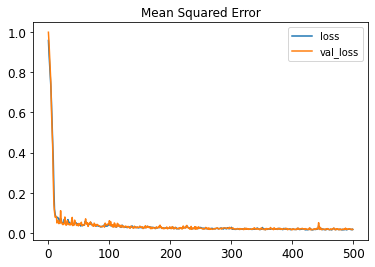

In [13]:
# lets plot the loss graph
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = "Mean Squared Error")
plt.show()

### Plot Model Predictions for Training Set

Use the model's `predict()` method to make a prediction for `y` using the `x` and `z` training data.  Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

In [55]:
# lets check the prediction
y_pred_nn = reg.predict(X_train).reshape(1,-1)[0]
df = train_df.copy()
df['y_pred_nn'] = y_pred_nn

In [56]:
df

,x_train,z_train,y_train,y_pred_nn
0,-0.710412,1.484588,1.060069,1.112133
1,1.170909,1.133518,0.597008,0.625894
2,1.348213,-1.747367,-0.249185,0.040299
3,1.404941,-1.683342,0.126391,-0.029254
4,-0.703923,0.091213,0.992957,0.983377
...,...,...,...,...
443,-0.538994,-1.336241,1.166031,1.229760
444,-1.321759,-1.163180,0.309647,0.240548
445,-0.274939,0.033026,1.227174,1.220158
446,1.268611,1.023924,-0.373109,0.170221


Saving figure 1-prediction-img
Saving figure 2-prediction-img
Saving figure 3-prediction-img
Saving figure 4-prediction-img


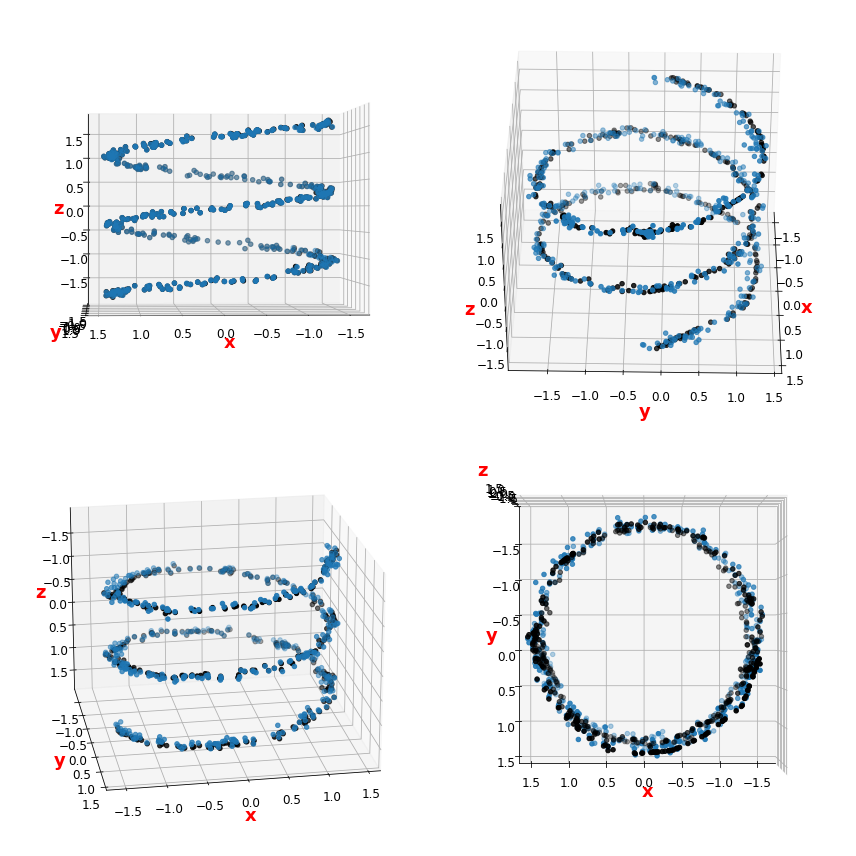

In [22]:
fit_x, fit_y, fit_z, scat_x, scat_y, scat_z = df['x_train'],df['y_pred_nn'],df['z_train'],df['x_train'],df['y_train'],df['z_train']
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)

# Compute Generalization Error

Compute the generalization error and use MSE as the generalization error metric.  Round your answers to four significant digits.  Print the generalization error for the model.

In [17]:
from sklearn.metrics import mean_squared_error
y_pred_test = reg.predict(X_test).reshape(1,-1)[0]
print("MSE: ", round(mean_squared_error(y_pred_test, y_test),4))

MSE:  0.0183


In [39]:
df['x_train'].sort_values(ascending=False)

447    1.436655
446    1.422531
445    1.407049
444    1.404941
443    1.401700
         ...   
4     -1.467202
3     -1.471233
2     -1.479567
1     -1.486481
0     -1.522608
Name: x_train, Length: 448, dtype: float64

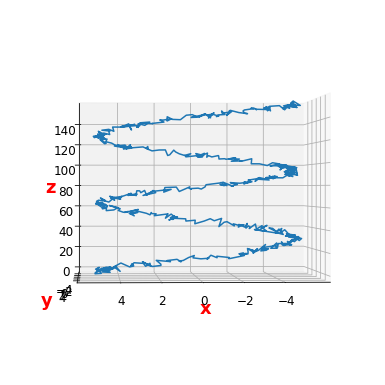

In [51]:
fig = plt.figure(figsize = (15,15))

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
# ax1.plot(df['x_train'].sort_values(),df['y_train'].sort_values(), df['z_train'].sort_values())
ax1.plot3D(data['x'],data['y'], data['z'])

ax1.set_xlabel("x", c='r', fontweight='bold', fontsize=18)
ax1.set_ylabel("y", c='r', fontweight='bold', fontsize=18)
ax1.set_zlabel("z", c='r', fontweight='bold', fontsize=18)
ax1.view_init(0, 87)

In [50]:
df

,x_train,z_train,y_train,y_pred_nn
0,-1.522608,1.484588,1.060069,1.112133
1,-1.486481,1.133518,0.597008,0.625894
2,-1.479567,-1.747367,-0.249185,0.040299
3,-1.471233,-1.683342,0.126391,-0.029254
4,-1.467202,0.091213,0.992957,0.983377
...,...,...,...,...
443,1.401700,-1.336241,1.166031,1.229760
444,1.404941,-1.163180,0.309647,0.240548
445,1.407049,0.033026,1.227174,1.220158
446,1.422531,1.023924,-0.373109,0.170221


In [62]:
train_df

,x_train,z_train,y_train
0,-0.710412,1.484588,1.060069
1,1.170909,1.133518,0.597008
2,1.348213,-1.747367,-0.249185
3,1.404941,-1.683342,0.126391
4,-0.703923,0.091213,0.992957
...,...,...,...
443,-0.538994,-1.336241,1.166031
444,-1.321759,-1.163180,0.309647
445,-0.274939,0.033026,1.227174
446,1.268611,1.023924,-0.373109


In [71]:
df1 = df.sort_values(by=['x_train','y_train','z_train'], ascending=True)
df1

,x_train,z_train,y_train,y_pred_nn
111,-1.522608,-1.086296,-0.155241,-0.196138
360,-1.486481,0.351742,-0.492601,-0.468424
54,-1.479567,-1.048658,-0.143725,-0.125560
198,-1.471233,0.363348,-0.587533,-0.525364
128,-1.467202,-1.068247,0.165297,-0.145551
...,...,...,...,...
314,1.401700,-0.391508,-0.301393,-0.230298
3,1.404941,-1.683342,0.126391,-0.029254
121,1.407049,-1.764873,-0.157347,-0.061006
375,1.422531,0.949720,-0.114167,-0.220177


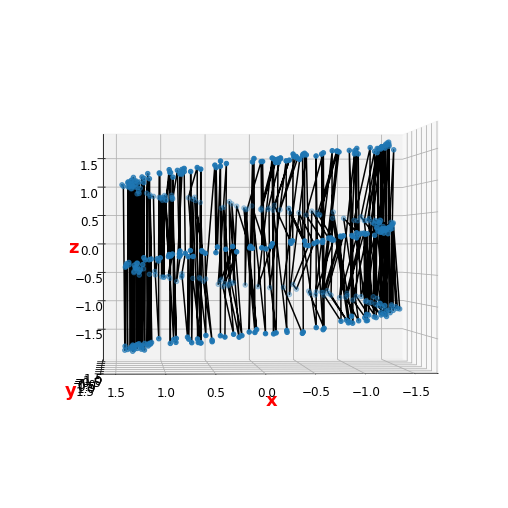

In [92]:
fig = plt.figure(figsize = (20,20))

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.plot3D(df1['x_train'],df1['y_train'], df1['z_train'], c='black')
ax1.scatter3D(df1['x_train'],df1['y_train'], df1['z_train'])
ax1.set_xlabel("x", c='r', fontweight='bold', fontsize=18)
ax1.set_ylabel("y", c='r', fontweight='bold', fontsize=18)
ax1.set_zlabel("z", c='r', fontweight='bold', fontsize=18)
ax1.view_init(0, 87)

In [81]:
df

,x_train,z_train,y_train,y_pred_nn
0,-1.522608,1.484588,1.060069,1.112133
1,-1.486481,1.133518,0.597008,0.625894
2,-1.479567,-1.747367,-0.249185,0.040299
3,-1.471233,-1.683342,0.126391,-0.029254
4,-1.467202,0.091213,0.992957,0.983377
...,...,...,...,...
443,1.401700,-1.336241,1.166031,1.229760
444,1.404941,-1.163180,0.309647,0.240548
445,1.407049,0.033026,1.227174,1.220158
446,1.422531,1.023924,-0.373109,0.170221


In [79]:
x = df['x_train'].values.reshape(-1,1).sort(axis = 0)

In [80]:
df['x_train']

0     -1.522608
1     -1.486481
2     -1.479567
3     -1.471233
4     -1.467202
         ...   
443    1.401700
444    1.404941
445    1.407049
446    1.422531
447    1.436655
Name: x_train, Length: 448, dtype: float64